# *Лабораторная работа №2*

## Построение регрессора для предсказания непрерывной величины (Теоретическая часть)

В данной лабораторной работе будет рассматриваться построение регрессионной модели для предсказания непрерывной величины. До текущего момента мы сталкивались только с задачей определения классовой принадлежности объекта, то есть в качестве результата должно было быть получено число из конечного множества целых чисел.

Подключим все необходимые библиотеки.

In [64]:
!pip install scikeras

In [69]:
import pandas as pd
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from scikeras.wrappers import KerasRegressor
##from scikeras import Sequential
##from scikeras import Dense

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Для примера построения регрессионной модели возьмем датасет, работу по очистке которого мы производили в рамках первой лекции (https://colab.research.google.com/drive/1fl7f7-8WA5GIjZ6qghfiD_2sEaCc1DQH?usp=sharing).

In [70]:
%%capture
!wget https://www.dropbox.com/s/s1sqfsi6x7hbs28/autos_mod.csv

In [71]:
df = pd.read_csv('autos_mod.csv', encoding='iso-8859-1')

In [72]:
df.sample(10)

,Unnamed: 0,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
132251,149069,5990,cabrio,2011,automatik,84,fortwo,80000,benzin,smart,nein
211820,238731,14500,kombi,2009,manuell,239,a6,150000,diesel,audi,nein
58431,66027,1150,andere,1997,manuell,101,3er,150000,benzin,bmw,NaN
314374,354225,5800,cabrio,2008,automatik,84,fortwo,50000,benzin,smart,nein
149548,168565,0,kombi,1989,automatik,136,100,150000,benzin,audi,nein
41677,47174,6000,limousine,2002,automatik,333,7er,150000,benzin,bmw,nein
64763,73136,4750,limousine,2002,manuell,143,3er,125000,benzin,bmw,nein
61461,69419,5600,limousine,2005,automatik,231,5er,150000,diesel,bmw,nein
26040,29530,1350,kombi,1995,manuell,75,golf,150000,benzin,volkswagen,nein
287973,324433,4200,kombi,2005,manuell,140,passat,150000,diesel,volkswagen,nein


Удалим лишний столбец, возникший в результате записи датасета в файл. Кроме того, очистим базу от пустых значений, так как не все регрессионные методы могут обрабатывать поврежденные данные.

In [73]:
del df['Unnamed: 0']
df_wo_na = df.dropna()
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

Проверим, что остались только необходимые нам столбцы.

In [74]:
df_wo_na.sample(10)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
64199,450,kleinwagen,1999,manuell,54,seicento,150000,benzin,fiat,ja
98661,16999,kombi,2009,automatik,197,5er,150000,diesel,bmw,nein
11281,16900,limousine,2011,manuell,170,golf,90000,diesel,volkswagen,nein
26633,2999,limousine,2002,automatik,170,mondeo,150000,benzin,ford,nein
218922,17800,kleinwagen,2014,manuell,86,a1,20000,benzin,audi,nein
163657,1500,limousine,2002,manuell,107,megane,60000,benzin,renault,nein
211885,2199,limousine,1991,manuell,174,80,150000,benzin,audi,nein
227777,5600,limousine,2004,manuell,224,leon,150000,lpg,seat,nein
170621,1200,kleinwagen,1995,manuell,45,polo,150000,benzin,volkswagen,nein
239118,11800,cabrio,2006,automatik,179,a4,150000,diesel,audi,nein


Проведем факторизацию в столбцах со строковыми значениями. Для этого выпишем имена всех объектных столбцов и в цикле будем вызывать factorize из библиотеки pandas. [0] в конце строки с командой необходим так как factorize возвращает два набора значений - преобразованный столбец значений и упорядоченный список меток. Так как проводить операцию обратную факторизации мы не собираемся, то и второй столбец для нас не представляет интереса.

In [ ]:
column_names = ['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']
for i in column_names:
  df_wo_na[i] = pd.factorize(df_wo_na[i])[0]

Разобьем выборку на тренировочный и тестовый наборы.

In [76]:
Y = df_wo_na['price']
X = df_wo_na.drop(['price'], axis = 1)
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

Обучим модель случайного леса из 100 решающих деревьев.

In [77]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)

RandomForestRegressor()

Оценку эффективности нашей модели проведем через расчет MAE. MAE (Mean Absolute Error) - средняя абсолютная ошибка, рассчитанная как сумма абсолютных ошибок в каждом предсказании, деленная на общий размер выборки.

In [78]:
rf_predict = rf_model.predict(test_points)
print(mean_absolute_error(test_values, rf_predict))

6210.142374060282


Разброс предсказнной цены в $5000+ не вызывает особого восторга. Попробуем произвести обучение других моделей и сравним результаты.

In [79]:
nn_model = Sequential()
nn_model.add(Dense(9, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 1000,
 validation_data = (test_points, test_values)
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6389.0288 - val_loss: 5796.9575
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6248.7871 - val_loss: 4998.6133
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6504.1890 - val_loss: 4657.8691
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5799.2568 - val_loss: 4546.8257
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4777.2666 - val_loss: 4458.9370
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5373.1416 - val_loss: 4346.9805
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5401.6484 - val_loss: 4260.6675
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5595.6665 - val_loss: 4168.5771
Epoch 9/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5468.4648 - val_loss: 4090.0374
Epoch 10/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5338.8081 - val_loss: 3965.2329


Значение функции потерь при обучении нейронной сети является MAE оценкой. Получили сопоставимый со случайным лесом результат.

Напоследок, построим регрессор через градиентный бустинг.

In [80]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [124]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)

Оценим качество получившейся модели.

In [83]:
print(mean_absolute_error(test_values, xgb_predict))

6576.53759765625


Градиентный бустинг показал результаты еще хуже, чем были до этого... Попробуем проанализировать причины такого поведения.

Выведем график соответствия предсказанной и фактической цены.

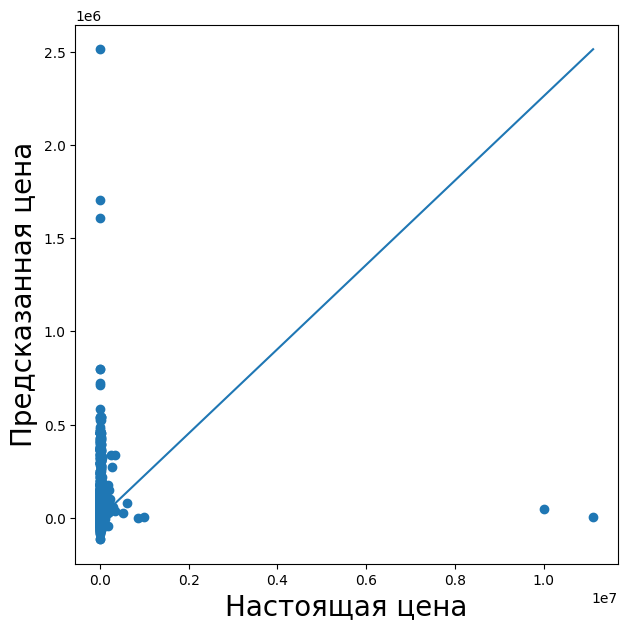

In [84]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, xgb_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(xgb_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Благодаря графическому представлению мы обнаружили сильнейшие вылеты максимальной цены автомобилей. Произведем анализ данного столбца.

array([[<Axes: title={'center': 'price'}>]], dtype=object)

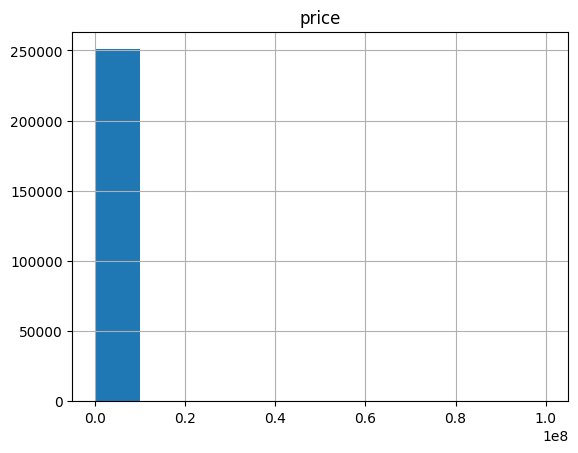

In [85]:
df_wo_na.hist(["price"])

На гистограмме видно, что у нас есть экземпляры, цена на которые доходит до 100 миллиардов. Произведем отбор записей по цене, исключив также записи со слишком низкой ценой.

In [86]:
df_wo_na = df_wo_na[(df_wo_na['price'] < 20000) & (df_wo_na['price'] > 50)]
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

Выведем гисторгамму для распределения цен на автомобили после внесенных нами изменений.

array([[<Axes: title={'center': 'price'}>]], dtype=object)

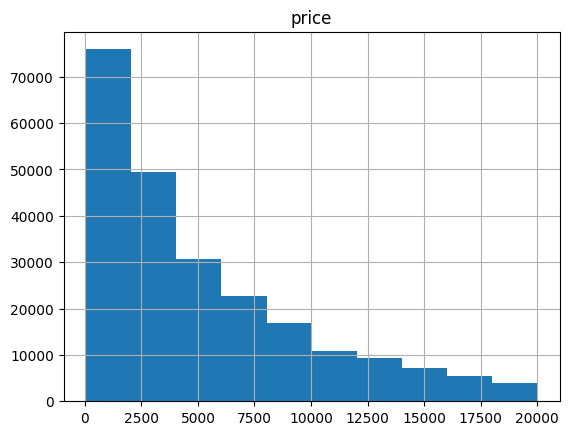

In [87]:
df_wo_na.hist(["price"])

Вновь проведем разделение на тренировочную и тестовую выборки.

In [88]:
Y = df_wo_na['price']
X = df_wo_na.drop(['price'], axis = 1)
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

Создадим модель градиентного бустинга на основе обновленных данных.

In [125]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)

In [91]:
print(mean_absolute_error(test_values, xgb_predict))

1254.5120849609375


Получившийся результат гораздо лучше с точки зрения отклонения абсолютной ошибки. Выведем график, чтобы оценить произошедшие изменения.

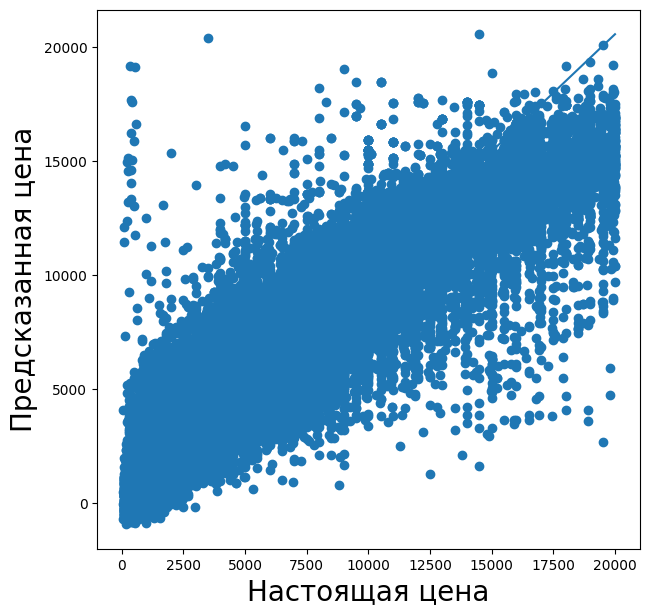

In [92]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, xgb_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(xgb_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

На графике явно видно, что наша модель показывает гораздо худшие резуьтаты для автомобилей с низкой стоимостью. Запомним этот факт и попробуем собрать модель на основе случайного леса, так как до проведения фильтрации по цене градиентный бустинг показывал худшие результаты.

In [93]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)

In [94]:
print(mean_absolute_error(test_values, rf_predict))

974.8865144376921


Средняя абсолютная ошибка меньше для модели случайного леса почти на $300, что является серьезным аргументом в ее пользу. Выведем график с отклонениями.

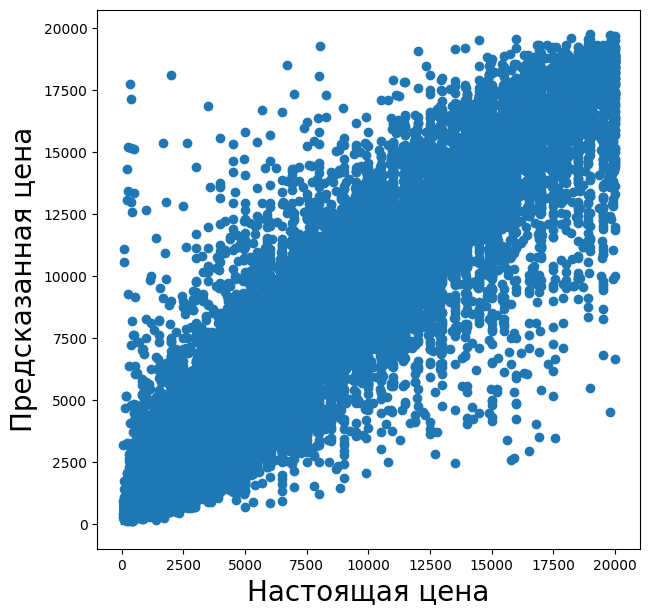

In [95]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, rf_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(rf_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Теперь давайте разберемся в причинах того, что градиентный бустинг показывает результаты гораздо хуже случайного леса. Разгадка кроется в типах ансамблевых методов, которые лежат в основе данных моделей.

Случайный лес работает на основе бэггинга, то есть собирает ансамбль из слабых учеников, каждый из которых имеет собственный независимый набор данных и, как следствие, свой набор правил разделения записей. После получения решения от всех учеников принимается некое усредненное значение.

Градиентный бустинг же направлен на исправление результата самого слабого ученика. Это приводит к тому, что итоговая модель будет смещаться в направлении самых больших вылетов, что мы и видели на графиках выше.

Можно сделать вывод, что механизм градиентного бустинга наилучшим образом подходит для решения задач со взвешенным набором данных, т.е. с (примерно) равным количеством записей, относящихся к каждому классу, либо диапазону значений.

Проведем исследование также для нейросетевой модели.

In [96]:
nn_model = Sequential()
nn_model.add(Dense(9, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 3789.9177 - val_loss: 2909.4128
Epoch 2/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2903.1985 - val_loss: 2720.3787
Epoch 3/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2686.1750 - val_loss: 2599.7837
Epoch 4/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 2562.3464 - val_loss: 2465.6094
Epoch 5/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2509.6155 - val_loss: 2416.4670
Epoch 6/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 2473.2339 - val_loss: 2489.3210
Epoch 7/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2439.6194 - val_loss: 2432.2781
Epoch 8/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2412.8228 - val_loss: 2359.7847
Epoch 9/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2395.1313 - val_loss: 2337.5452
Epoch 10/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2397.1077 - val_loss: 2403.6980
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
2403.69799804

Теперь лидером нашего антирейтинга результатов стала модель, основанная на нейронных сетях.

Попробуем провести нормализацию данных и сранить результаты.

In [97]:
df_norm = df_wo_na
Y = df_norm['price']
X = df_norm.drop(['price'], axis = 1)
for i in X.columns:
  X[i]=(X[i]-X[i].min())/(X[i].max()-X[i].min())

In [98]:
X

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,0.000000,0.746269,0.0,0.126712,0.000000,1.000000,0.000000,0.000000,0.0
1,0.000000,0.850746,0.0,0.116438,0.004032,0.586207,0.166667,0.026316,0.0
2,0.142857,0.656716,0.0,0.172945,0.008065,1.000000,0.000000,0.052632,1.0
3,0.285714,0.791045,0.0,0.184932,0.012097,1.000000,0.000000,0.078947,0.0
4,0.142857,0.791045,0.0,0.178082,0.020161,1.000000,0.000000,0.105263,0.0
...,...,...,...,...,...,...,...,...,...
232494,0.142857,0.880597,0.0,0.238014,0.000000,1.000000,0.166667,0.000000,0.0
232495,0.428571,0.805970,0.0,0.003425,0.008065,1.000000,0.166667,0.052632,0.0
232496,0.142857,0.791045,0.0,0.383562,0.423387,1.000000,0.000000,0.236842,1.0
232497,0.285714,0.731343,1.0,0.171233,0.088710,0.827586,0.000000,0.342105,0.0


In [99]:
Y

,price
0,1500
1,3600
2,650
3,2200
4,2000
...,...
232494,7900
232495,3999
232496,3200
232497,1199


In [100]:
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

In [126]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)

In [103]:
print(mean_absolute_error(test_values, xgb_predict))

1256.4119873046875


Положительная динамика в модели градиентного бустинга прослеживается, но она явно не претендует на роль ключевого фактора.

In [104]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)

In [105]:
print(mean_absolute_error(test_values, rf_predict))

972.3532931110585


А вот для случайного леса нормализация сыграла даже немного отрицательную роль. Связано это с тем, что при построении правил решающему дереву гораздо проще ориентироваться на натуральные числа, нежели на диапазон [0, 1].

In [106]:
nn_model = Sequential()
nn_model.add(Dense(9, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4551.8071 - val_loss: 3188.0825
Epoch 2/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3019.2917 - val_loss: 2438.9290
Epoch 3/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2236.5205 - val_loss: 1997.5457
Epoch 4/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1958.9888 - val_loss: 1919.5687
Epoch 5/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1898.5255 - val_loss: 1870.6853
Epoch 6/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1846.1610 - val_loss: 1832.2714
Epoch 7/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1811.9543 - val_loss: 1796.5577
Epoch 8/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1769.5439 - val_loss: 1758.8489
Epoch 9/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1746.6381 - val_loss: 1716.5557
Epoch 10/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1693.7493 - val_loss: 1673.6311
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1673.631713867

Для нейросетевой модели нормализация значительно облегчила задачу, но приблизиться к точности ансамблевых методов мы так и не смогли.

Рассмотрим популярность различных признаков при принятии решения в модели градиентного бустинга и попробуем удалить наиболее непопулярные.

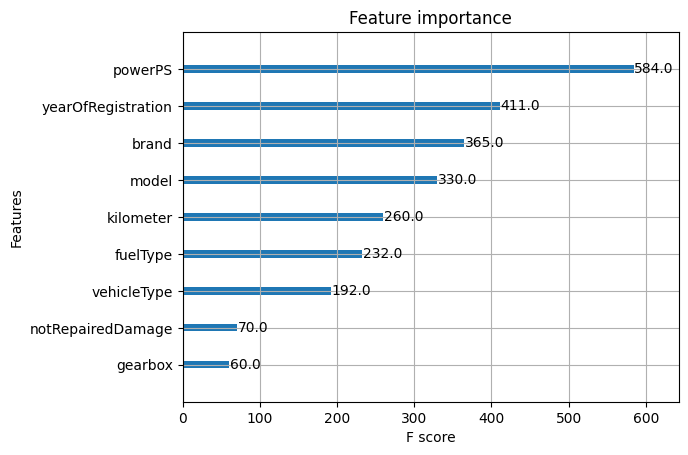

In [107]:
xgb.plot_importance(xg_reg)
plt.show()

In [108]:
del df_wo_na['notRepairedDamage']
del df_wo_na['gearbox']
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

Проверим влияние внесенных изменений на качество наших моделей.

In [109]:
nn_model = Sequential()
nn_model.add(Dense(7, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 100,
 validation_data = (test_points, test_values)
)

nn_predict = nn_model.predict(test_points)
print(mean_absolute_error(test_values, nn_predict))

Epoch 1/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4597.8652 - val_loss: 3228.6592
Epoch 2/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 3082.0610 - val_loss: 2575.6316
Epoch 3/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 2371.7603 - val_loss: 1997.7537
Epoch 4/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1951.6425 - val_loss: 1869.7941
Epoch 5/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1846.1511 - val_loss: 1798.1840
Epoch 6/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1779.4897 - val_loss: 1743.9576
Epoch 7/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1714.7040 - val_loss: 1688.5447
Epoch 8/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1662.6864 - val_loss: 1633.7831
Epoch 9/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1605.9133 - val_loss: 1587.1251
Epoch 10/10
1860/1860 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1563.7391 - val_loss: 1549.1665
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1549.1661376953

Точность нейросетевой модели, хоть и незначительно, но упала.

In [110]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)

In [111]:
print(mean_absolute_error(test_values, rf_predict))

981.3277708606071


In [112]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

1258.9869384765625


А вот ансамблевые методы показали небольшой рост точности.

Ну и напоследок проверим, каким образом скажется на качестве моделей разделение столбцов по способу факторизации.

In [113]:
df_wo_na = df.dropna()
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

Для столбцов с высокой кардинальностью оставим стандартный алгоритм, а для столбцов с низкой применим OneHotEncoding.

In [ ]:
column_names_fact = ['vehicleType', 'model','brand']
column_names_dummies = ['gearbox', 'fuelType', 'notRepairedDamage']
for i in column_names_fact:
  df_wo_na[i] = pd.factorize(df_wo_na[i])[0]
df_wo_na = pd.get_dummies(df_wo_na, prefix=column_names_dummies)

In [115]:
df_wo_na = df_wo_na[(df_wo_na['price'] < 20000) & (df_wo_na['price'] > 50)]
df_wo_na.reset_index(inplace=True)
del df_wo_na['index']

In [116]:
Y = df_wo_na['price']
X = df_wo_na.drop(['price'], axis = 1)

In [117]:
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

In [118]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_points, train_values)
rf_predict = rf_model.predict(test_points)

In [119]:
print(mean_absolute_error(test_values, rf_predict))

974.5691113386672


Модель случайного леса осталась равнодушна к увеличению количества столбцов.

In [120]:
xg_reg.fit(train_points, train_values)
xgb_predict = xg_reg.predict(test_points)
print(mean_absolute_error(test_values, xgb_predict))

1255.333984375


А вот градиентный бустинг значительно улучшил точность предсказываемой цены.

Попробуем собрать еще модель линейной регрессии.

In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_points, train_values)
lr_predict = model.predict(test_points)
print(mean_absolute_error(test_values, lr_predict))

2054.473353170443


Метрика MAE говорит, что модель линейной регрессии справляется с задачей лучше, чем нейронные сети. Проверим этот результат графически.

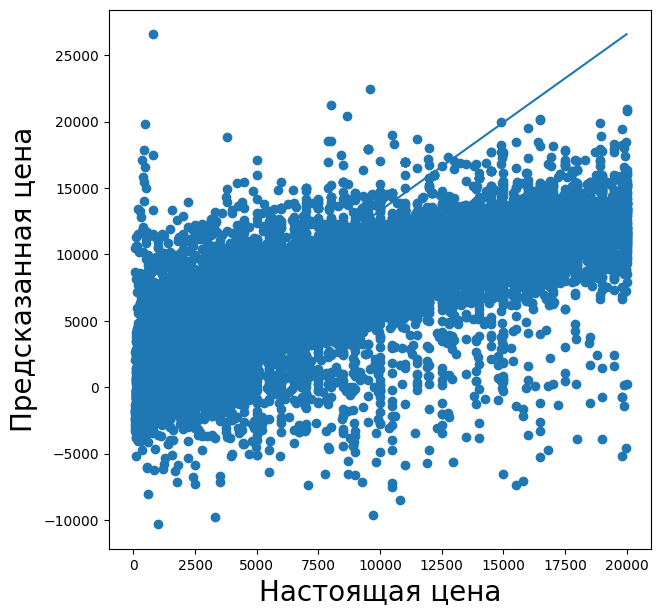

In [123]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, lr_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(lr_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Из-за излишней концентрации на вылетах модель линейной регрессии имеет тенденцию занижать цену для дорогих автомобилей. Связано это с тем, что наша выборка не является взвешенной, то есть имеет гораздо меньший объем записей об автомобилях с высокой ценой, чем с низкой.

## Построение регрессора для предсказания непрерывной величины (*Практическая* часть)

Вашим заданием в данной лабораторной будет построение регрессионной модели для предсказания цены квартиры в Москве.

https://www.kaggle.com/datasets/egorkainov/moscow-housing-price-dataset/data

Методика оценки - **mean_absolute_error**

Ниже приведены инструкции для загрузки тренировочной  (разделение ее на обучающую и тестовую части остается на усмотрение исполнителя) и валидационной части датасета. Валидационная часть не участвует в обучении, только в получении итоговой оценки.

In [ ]:
%%capture
!wget -O MSK_Price_train.csv https://www.dropbox.com/scl/fi/gwssm0f77en2nuiu34o5m/MSK_Price_train.csv?rlkey=vg1hhva3yaxsvo3zl1flgfhi9&dl=0
!wget -O MSK_Price_valid.csv https://www.dropbox.com/scl/fi/4fbkx0r16yjemr245f848/MSK_Price_valid.csv?rlkey=be7phwzd5d4py8kiqwdfiuw8u&dl=0